 # <font color='fc6a08'>Engajamento dos Funcionários - Análise Exploratória de Dados</font>

# Tabela de Conteúdos

[1. Informações básicas](#1.-Informações-básicas)

[2. Bibliotecas](#2.-Bibliotecas)

[3. Dados](#3.-Dados)

* [3.1 Preparação](#3.1-Preparação)

* [3.2 Respostas obtidas](#3.2-Respostas-obtidas)

[4. Estatística básica](#4.-Estatística-básica)

* [4.1 Agrupamentos](#4.1-Agrupamentos)

[5. Visualizações](#5.-Visualizações)

* [5.1 Demografia](#5.1-Demografia)

* [5.2 Expectativas](#5.2-Expectativas)

* [5.3 Relação funcionário-empresa](#5.3-Relação-funcionário-empresa)

* [5.4 Canais de comunicação](#5.4-Canais-de-comunicação)

* [5.5 Visões](#5.5-Visões)

## 1. Informações básicas
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

**Fonte:** Santo Caos

**Descrição das colunas:**

| Variável | Descrição | Tipo |  
|:---|:---|:---|
| numero | 'Numero do funcionário' | discreta |
| grupo | '6 Abaixo temos alguns grupos com funções. Em qual grupo sua função está?' | nominal |
| faixa_etaria | '7 Quantos anos você tem?' | ordinal |
| genero | '8 Com qual gênero você se identifica?' | nominal |
| tempo_empresa | '11 Há quanto tempo você trabalha na empresa?' | ordinal |
| expectativa | '13 Em poucas palavras, quais eram suas expectativas quando veio trabalhar aqui?' | nominal |
| trabalhar_eh | '14 Considerando suas expectativas, você considera que trabalhar aqui é:' | ordinal |
| onbording | '17 Pensando na apresentação do lugar, do trabalho e das pessoas, como você considera que a sua empresa te recebeu quando você entrou?' | discreta |
| procedimento_funcao | '18 Você conhece os procedimentos (tarefas, processos, conhecimentos) da sua função?' | discreta |
| meta_area | '19 As metas e objetivos da sua área são claras para você?' | discreta |
| meta_followup | '20 Como é para você acompanhar o andamento das suas metas?' | discreta |
| informacao_empresa | '21 Quanto você se considera informado sobre o que acontece na empresa atualmente?' | discreta |
| informacao_meio | '22 Por onde/quem você se informa?(selecione quantas opções achar importante)' |  |
| info_meio_gestor | 'Gestor/líder' | nominal |
| info_meio_colegas | 'Colegas' | nominal |
| info_meio_email | 'E-mail' | nominal |
| info_meio_informativos | 'Informativos da empresa' | nominal |
| info_meio_whats | 'WhatsApp' | nominal | 
| info_meio_outro | 'Outro (especifique)' | nominal |
| trabalho_resultado_clareza | '23 A relação entre o seu trabalho e os resultados da empresa é clara?' | discreta |
| nota_engajamento | 'NOTA ENGAJAMENTO' | contínua |
| visao_geral | '70 Pensando no momento atual da empresa, qual sentimento você acredita que melhor representa a visão da maioria dos funcionários:' | nominal |
| visao_funcionario | '71 E para você, qual sentimento melhor representa esse momento atual da empresa?'| nominal |

## 2. Bibliotecas
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from PIL import Image # image
from wordcloud import WordCloud, ImageColorGenerator # wordcloud
import nltk # nlp para português

## 3. Dados
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

In [189]:
# carregar dados
df = pd.read_excel('exercicio - analise de dados.xlsx', sheet_name='bd')

In [190]:
# exibir todas as colunas
pd.set_option('max_columns', None)

In [191]:
# renomear colunas
df.columns = ['numero', 'grupo', 'faixa_etaria', 'genero', 'tempo_empresa', 'expectativa',
             'trabalhar_eh', 'onbording', 'procedimento_funcao', 'meta_area', 'meta_followup',
             'informacao_empresa', 'informacao_meio', 'info_meio_gestor', 'info_meio_colegas',
             'info_meio_email', 'info_meio_informativos', 'info_meio_whats', 'info_meio_outro',
             'trabalho_resultado_clareza', 'nota_engajamento', 'visao_geral', 'visao_funcionario']

In [192]:
# visualizar
df.head()

,numero,grupo,faixa_etaria,genero,tempo_empresa,expectativa,trabalhar_eh,onbording,procedimento_funcao,meta_area,meta_followup,informacao_empresa,informacao_meio,info_meio_gestor,info_meio_colegas,info_meio_email,info_meio_informativos,info_meio_whats,info_meio_outro,trabalho_resultado_clareza,nota_engajamento,visao_geral,visao_funcionario
0,1,"GRUPO 3 Agente, Analista, Assessor, Assistente...",entre 39 e 45 anos,Masculino,De 10 a 15 anos,Crescer Junto com o Grupo,É melhor do que esperava,5,5,5,5,4,NaN,Gestor/líder,Colegas,E-mail,Informativos da empresa,NaN,NaN,5,4.383911,"Empolgação (comprometimento, determinação)","Empolgação (comprometimento, determinação)"
1,2,"GRUPO 1 Alinhador, Almoxarife, Auxiliar, Balan...",entre 39 e 45 anos,Masculino,De 5 a 10 anos,CRESCIMENTO PROFISSIONAL,É muito melhor do que esperava,5,4,4,5,3,NaN,Gestor/líder,NaN,E-mail,Informativos da empresa,NaN,NaN,3,4.115007,"Interesse (esperança, vontade)","Interesse (esperança, vontade)"
2,3,"GRUPO 1 Alinhador, Almoxarife, Auxiliar, Balan...",entre 39 e 45 anos,Feminino,Até 1 ano,"Realizar meus objetivos,novas oportunidades",É melhor do que esperava,5,5,5,4,3,NaN,Gestor/líder,NaN,E-mail,NaN,WhatsApp,NaN,5,4.199856,"Interesse (esperança, vontade)","Empolgação (comprometimento, determinação)"
3,4,"GRUPO 3 Agente, Analista, Assessor, Assistente...",entre 32 e 38 anos,Masculino,De 10 a 15 anos,"Oportunidade, aprendizado, desempenhar uma car...",É pior que esperava,3,4,5,4,3,NaN,Gestor/líder,Colegas,E-mail,Informativos da empresa,NaN,NaN,4,2.795743,"Insegurança (confusão, desânimo)","Afastamento (passividade, saudosismo)"
4,5,"GRUPO 3 Agente, Analista, Assessor, Assistente...",entre 53 e 59 anos,Masculino,De 5 a 10 anos,Melhor Remuneração e Segurança.,É o que esperava,5,4,5,3,3,NaN,Gestor/líder,Colegas,NaN,NaN,WhatsApp,NaN,5,4.047763,"Interesse (esperança, vontade)","Empolgação (comprometimento, determinação)"


In [193]:
print('O dataset possui {} linhas e {} colunas.'.format(df.shape[0], df.shape[1]))

O dataset possui 49 linhas e 23 colunas.


In [194]:
# tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   numero                      49 non-null     int64  
 1   grupo                       49 non-null     object 
 2   faixa_etaria                49 non-null     object 
 3   genero                      49 non-null     object 
 4   tempo_empresa               49 non-null     object 
 5   expectativa                 48 non-null     object 
 6   trabalhar_eh                49 non-null     object 
 7   onbording                   49 non-null     int64  
 8   procedimento_funcao         49 non-null     int64  
 9   meta_area                   49 non-null     int64  
 10  meta_followup               49 non-null     int64  
 11  informacao_empresa          49 non-null     int64  
 12  informacao_meio             0 non-null      float64
 13  info_meio_gestor            37 non-nu

In [195]:
# dados faltantes
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentagem'])
missing_data

,Total,Porcentagem
info_meio_outro,49,1.000000
informacao_meio,49,1.000000
info_meio_email,38,0.775510
info_meio_whats,34,0.693878
info_meio_informativos,33,0.673469
info_meio_colegas,31,0.632653
info_meio_gestor,12,0.244898
expectativa,1,0.020408
visao_funcionario,0,0.000000
onbording,0,0.000000


💡 Funcionários não citaram, além das fontes indicadas, outro meio para obtenção de informações sobre a empresa.

### 3.1 Preparação
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

In [196]:
df_prep = df.copy()

In [197]:
# deletar colunas 100% nulas
df_prep.drop(['info_meio_outro', 'informacao_meio'], axis=1, inplace=True)

In [198]:
# dummies
df_prep['info_meio_gestor'] = np.where(df_prep['info_meio_gestor'] == 'Gestor/líder', 1, 0)
df_prep['info_meio_colegas'] = np.where(df_prep['info_meio_colegas'] == 'Colegas', 1, 0)
df_prep['info_meio_email'] = np.where(df_prep['info_meio_email'] == 'E-mail', 1, 0)
df_prep['info_meio_informativos'] = np.where(df_prep['info_meio_informativos'] == 'Informativos da empresa', 1, 0)
df_prep['info_meio_whats'] = np.where(df_prep['info_meio_whats'] == 'WhatsApp', 1, 0)

In [200]:
# atribuir novos valores
g1 = 'GRUPO 1 Alinhador, Almoxarife, Auxiliar, Balanceador, Balconista, Borracheiro, Capoteiro, Coletador, Copeira, Eletricista, Estagiário, Estoquista, Ferramenteiro, Hostess, Instalador, Instrutor, Lanterneiro, Latoeiro, Lavador, Manobrista, Mecânico, Mecatrônico, Montador, Motorista, Operador, Pintor, Polidor, Porteiro, Preparador, Técnico, Telefonista'
g2 = 'GRUPO 2 Agendamento, Apontador, Assistente Técnico, Caixa, Controlador, Encarregado, Líder, Líder Kaizen, Lqs, Programador, Recepcionista, Secretaria'
g3 = 'GRUPO 3 Agente, Analista, Assessor, Assistente, Avaliador, Chefe, Comprador, Consultor, Designer, Entregador, Especialista, Garantista, Orçamentista, Promotor, Recuperador, Vendedor'
g4 = 'GRUPO 4 Auditoria, Coordenador, Supervisor'
g5 = 'GRUPO 5 Advogado, Gerentes, Diretores'

df_prep.loc[df_prep['grupo'] == g1, 'grupo'] = 'Grupo 1'
df_prep.loc[df_prep['grupo'] == g2, 'grupo'] = 'Grupo 2'
df_prep.loc[df_prep['grupo'] == g3, 'grupo'] = 'Grupo 3'
df_prep.loc[df_prep['grupo'] == g4, 'grupo'] = 'Grupo 4'
df_prep.loc[df_prep['grupo'] == g5, 'grupo'] = 'Grupo 5'

### 3.2 Respostas obtidas
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

In [109]:
# valores únicos por variável
df.nunique()

numero                        49
grupo                          5
faixa_etaria                   7
genero                         3
tempo_empresa                  6
expectativa                   46
trabalhar_eh                   5
onbording                      4
procedimento_funcao            4
meta_area                      5
meta_followup                  5
informacao_empresa             5
info_meio_gestor               1
info_meio_colegas              1
info_meio_email                1
info_meio_informativos         1
info_meio_whats                1
trabalho_resultado_clareza     5
nota_engajamento              49
visao_geral                    4
visao_funcionario              6
dtype: int64

In [110]:
sorted(df['grupo'].unique().tolist())

['GRUPO 1 Alinhador, Almoxarife, Auxiliar, Balanceador, Balconista, Borracheiro, Capoteiro, Coletador, Copeira, Eletricista, Estagiário, Estoquista, Ferramenteiro, Hostess, Instalador, Instrutor, Lanterneiro, Latoeiro, Lavador, Manobrista, Mecânico, Mecatrônico, Montador, Motorista, Operador, Pintor, Polidor, Porteiro, Preparador, Técnico, Telefonista',
 'GRUPO 2 Agendamento, Apontador, Assistente Técnico, Caixa, Controlador, Encarregado, Líder, Líder Kaizen, Lqs, Programador, Recepcionista, Secretaria',
 'GRUPO 3 Agente, Analista, Assessor, Assistente, Avaliador, Chefe, Comprador, Consultor, Designer, Entregador, Especialista, Garantista, Orçamentista, Promotor, Recuperador, Vendedor',
 'GRUPO 4 Auditoria, Coordenador, Supervisor',
 'GRUPO 5 Advogado, Gerentes, Diretores']

In [111]:
sorted(df['faixa_etaria'].unique().tolist())

['entre 18 e 24 anos',
 'entre 25 e 31 anos',
 'entre 32 e 38 anos',
 'entre 39 e 45 anos',
 'entre 46 e 52 anos',
 'entre 53 e 59 anos',
 'menos de 18 anos']

In [112]:
df['genero'].unique().tolist()

['Masculino', 'Feminino', 'Prefiro não declarar']

In [113]:
sorted(df['tempo_empresa'].unique().tolist())

['Até 1 ano',
 'De 1 a 2 anos',
 'De 10 a 15 anos',
 'De 2 a 5 anos',
 'De 5 a 10 anos',
 'Mais de 20 anos']

In [114]:
df['trabalhar_eh'].unique().tolist()

['É melhor do que esperava',
 'É muito melhor do que esperava',
 'É pior que esperava',
 'É o que esperava',
 'É muito pior do que esperava']

In [115]:
sorted(df['onbording'].unique().tolist())

[2, 3, 4, 5]

💡 Nenhum funcionário assinalou "1" referente à recepção quando entrou na empresa.

In [116]:
sorted(df['procedimento_funcao'].unique().tolist())

[2, 3, 4, 5]

💡 Nenhum funcionário assinalou "1" para o nível de conhecimento dos procedimentos referentes à função.

In [117]:
sorted(df['meta_area'].unique().tolist())

[1, 2, 3, 4, 5]

In [118]:
sorted(df['meta_followup'].unique().tolist())

[1, 2, 3, 4, 5]

In [119]:
sorted(df['informacao_empresa'].unique().tolist())

[1, 2, 3, 4, 5]

In [120]:
sorted(df['trabalho_resultado_clareza'].unique().tolist())

[1, 2, 3, 4, 5]

In [121]:
df['visao_geral'].unique().tolist()

['Empolgação (comprometimento, determinação)',
 'Interesse (esperança, vontade)',
 'Insegurança (confusão, desânimo)',
 'Afastamento (passividade, saudosismo)']

In [122]:
df['visao_funcionario'].unique().tolist()

['Empolgação (comprometimento, determinação)',
 'Interesse (esperança, vontade)',
 'Afastamento (passividade, saudosismo)',
 'Insegurança (confusão, desânimo)',
 'Resistência (raiva, críticas)',
 'Choque (defensiva, medo)']

💡 Se as opções sobre **visao_geral** forem as mesmas de **visao_funcionario**, "Resistência (raiva, críticas)" e "Choque (defensiva, medo)" não constam como sentimento sobre o ambiente da empresa no geral.

In [229]:
df_prep.query("grupo == 'Grupo 4'")

,numero,grupo,faixa_etaria,genero,tempo_empresa,expectativa,trabalhar_eh,onbording,procedimento_funcao,meta_area,meta_followup,informacao_empresa,info_meio_gestor,info_meio_colegas,info_meio_email,info_meio_informativos,info_meio_whats,trabalho_resultado_clareza,nota_engajamento,visao_geral,visao_funcionario
48,49,Grupo 4,entre 39 e 45 anos,Masculino,Até 1 ano,Soma com empresa na busca de resultados.,É muito melhor do que esperava,5,4,4,2,2,1,0,0,1,0,5,4.20772,"Interesse (esperança, vontade)","Empolgação (comprometimento, determinação)"


In [231]:
df_prep.query("grupo == 'Grupo 5'")

,numero,grupo,faixa_etaria,genero,tempo_empresa,expectativa,trabalhar_eh,onbording,procedimento_funcao,meta_area,meta_followup,informacao_empresa,info_meio_gestor,info_meio_colegas,info_meio_email,info_meio_informativos,info_meio_whats,trabalho_resultado_clareza,nota_engajamento,visao_geral,visao_funcionario
12,13,Grupo 5,entre 39 e 45 anos,Masculino,De 10 a 15 anos,NOVAS EXPERIENCIA E MAIOR PROFISSIONALISMO,É muito melhor do que esperava,5,5,5,5,5,1,0,1,1,1,5,4.894444,"Empolgação (comprometimento, determinação)","Empolgação (comprometimento, determinação)"


💡 Grupos 4 e 5 tiveram somente 1 respondente cada.

## 4. Estatística básica
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

In [123]:
# seleção das variáveis numéricas
df_num = df[['onbording', 'procedimento_funcao', 'meta_area', 'meta_followup', 'informacao_empresa', 'trabalho_resultado_clareza', 'nota_engajamento']]

In [124]:
# descrição estatística das variáveis numéricas
df_num.describe()

,onbording,procedimento_funcao,meta_area,meta_followup,informacao_empresa,trabalho_resultado_clareza,nota_engajamento
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,4.612245,4.489796,4.428571,3.795918,3.306122,4.122449,4.002445
std,0.837066,0.710705,0.957427,1.224398,0.917517,1.033454,0.578651
min,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.566595
25%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.690260
50%,5.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.115007
75%,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.447186
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.894444


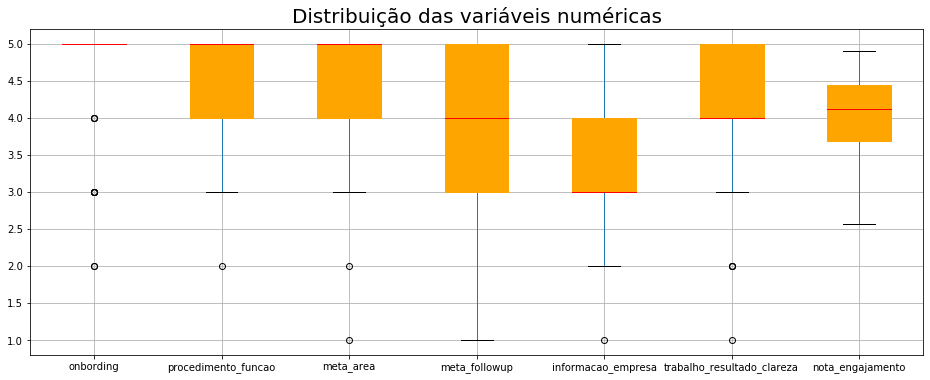

In [125]:
# boxplot
plt.figure(figsize=(16, 6))
df_num.boxplot(patch_artist=True, boxprops=dict(facecolor='orange', color='orange'), 
               medianprops=dict(color='red'))
plt.title("Distribuição das variáveis numéricas", fontsize=20)
plt.show()

💡 **onbording:** notas concentram-se em 5 - indicação de que os funcionários acreditam que foram bem recebidos; 

💡 **procedimento_funcao** e **meta_area** possuem distribuição quase idêntica - possuem conhecimento sobre a função exercida e a meta da área; 

💡 **meta_followup:** apesar do conhecimento sobre a meta da área ser alta, o acompanhamento não se mantém ao longo do tempo na empresa - dados mais dispersos; 

💡 **informacao_empresa:** possui média e mediana mais baixa em comparação com as outras variáveis, ou seja, os funcionários se consideram pouco informados sobre o que acontece na empresa;

💡 **nota_engajamento:** concentra-se entre 3.7 e 4.4.

In [126]:
corr = df_num.corr()
corr

,onbording,procedimento_funcao,meta_area,meta_followup,informacao_empresa,trabalho_resultado_clareza,nota_engajamento
onbording,1.000000,0.360915,0.185680,0.165106,0.022144,0.320941,0.529209
procedimento_funcao,0.360915,1.000000,0.664828,0.452441,0.212558,0.370478,0.380166
meta_area,0.185680,0.664828,1.000000,0.573774,0.393006,0.472241,0.510297
meta_followup,0.165106,0.452441,0.573774,1.000000,0.205128,0.448234,0.386403
informacao_empresa,0.022144,0.212558,0.393006,0.205128,1.000000,0.421040,0.501634
trabalho_resultado_clareza,0.320941,0.370478,0.472241,0.448234,0.421040,1.000000,0.670541
nota_engajamento,0.529209,0.380166,0.510297,0.386403,0.501634,0.670541,1.000000


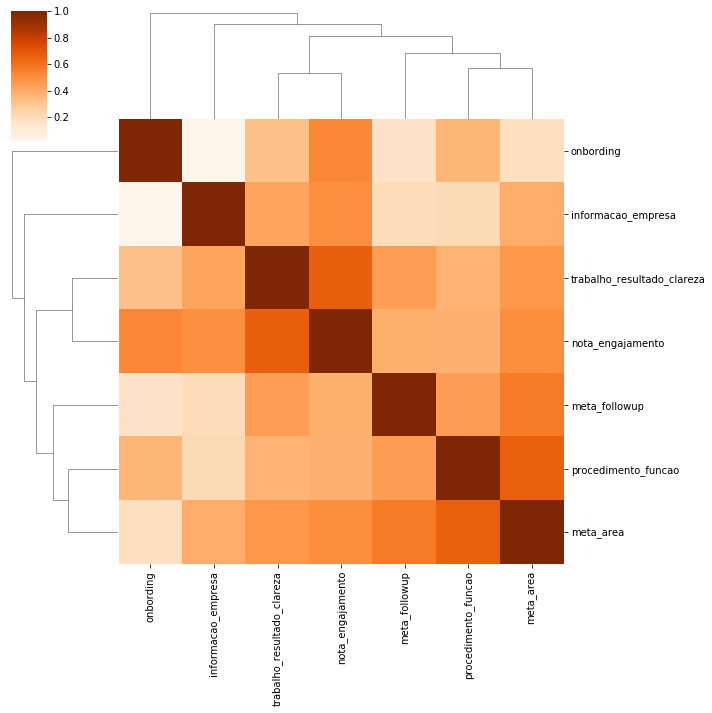

In [166]:
sns.clustermap(corr, cmap='Oranges')

💡 **informacao_empresa** e **meta_area** possuem baixa correlação: o funcionário pode conhecer a meta da própria área mas não da empresa como um todo. Isso se confirma com a prevalência de altas notas relacionadas a meta da área e uma maior dispersão sobre as informações da empresa.
  

### 4.1 Agrupamentos
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

In [214]:
df_prep.groupby('grupo').agg({'nota_engajamento': ['mean', 'median', 'count', 'std']})

nota_engajamento                          
                    mean    median count       std
grupo                                             
Grupo 1         3.936936  4.001804    26  0.489740
Grupo 2         3.799320  4.154401     7  0.893498
Grupo 3         4.147291  4.255556    14  0.537378
Grupo 4         4.207720  4.207720     1       NaN
Grupo 5         4.894444  4.894444     1       NaN

💡 Grupos 1 e 2 possuem notas de engajamento mais baixas na média.

In [218]:
df_prep.groupby('grupo').agg({'informacao_empresa': ['mean', 'median', 'count', 'std']})

informacao_empresa                       
                      mean median count       std
grupo                                            
Grupo 1           3.192308      3    26  0.895287
Grupo 2           3.142857      3     7  1.069045
Grupo 3           3.571429      4    14  0.755929
Grupo 4           2.000000      2     1       NaN
Grupo 5           5.000000      5     1       NaN

💡 Na média o Grupo 3 se sente ligeiramente mais informado sobre o que acontece na empresa.

In [277]:
# fontes de informação
dg = df_prep.groupby('grupo').agg({'info_meio_gestor': ['count','sum']})        # gestor
dc = df_prep.groupby('grupo').agg({'info_meio_colegas': ['count','sum']})       # colegas
de = df_prep.groupby('grupo').agg({'info_meio_email': ['count','sum']})         # email
di = df_prep.groupby('grupo').agg({'info_meio_informativos': ['count','sum']})  # informativos
dw = df_prep.groupby('grupo').agg({'info_meio_whats': ['count','sum']})         # whatsapp

In [253]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [278]:
display_side_by_side(dg,dc,de,di,dw)

info_meio_gestor 
 
 
 
 count 
 sum 
 
 
 grupo 
 
 
 
 
 
 
 Grupo 1 
 26 
 19 
 
 
 Grupo 2 
 7 
 5 
 
 
 Grupo 3 
 14 
 11 
 
 
 Grupo 4 
 1 
 1 
 
 
 Grupo 5 
 1 
 1 
 
 
 
 
 
 
 info_meio_colegas 
 
 
 
 count 
 sum 
 
 
 grupo 
 
 
 
 
 
 
 Grupo 1 
 26 
 9 
 
 
 Grupo 2 
 7 
 4 
 
 
 Grupo 3 
 14 
 5 
 
 
 Grupo 4 
 1 
 0 
 
 
 Grupo 5 
 1 
 0 
 
 
 
 
 
 
 info_meio_email 
 
 
 
 count 
 sum 
 
 
 grupo 
 
 
 
 
 
 
 Grupo 1 
 26 
 2 
 
 
 Grupo 2 
 7 
 1 
 
 
 Grupo 3 
 14 
 7 
 
 
 Grupo 4 
 1 
 0 
 
 
 Grupo 5 
 1 
 1 
 
 
 
 
 
 
 info_meio_informativos 
 
 
 
 count 
 sum 
 
 
 grupo 
 
 
 
 
 
 
 Grupo 1 
 26 
 6 
 
 
 Grupo 2 
 7 
 2 
 
 
 Grupo 3 
 14 
 6 
 
 
 Grupo 4 
 1 
 1 
 
 
 Grupo 5 
 1 
 1 
 
 
 
 
 
 
 info_meio_whats 
 
 
 
 count 
 sum 
 
 
 grupo 
 
 
 
 
 
 
 Grupo 1 
 26 
 6 
 
 
 Grupo 2 
 7 
 4 
 
 
 Grupo 3 
 14 
 4 
 
 
 Grupo 4 
 1 
 0 
 
 
 Grupo 5 
 1 
 1

💡 Gestor é o maior veículo de informação na empresa, quase duas vezes a 2ª opção: os colegas.

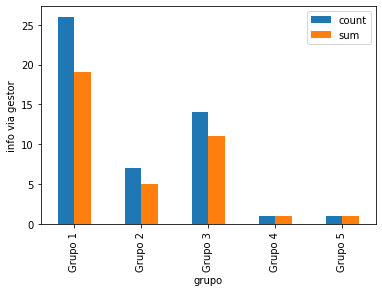

In [279]:
df_daily=dg.reset_index()

df_daily.plot(x='grupo', y='info_meio_gestor',kind="bar")
plt.ylabel('info via gestor')
plt.show()

In [259]:
from statistics import mode 

In [ ]:
💡

In [260]:
df_prep.groupby('grupo').agg({'visao_geral': [mode]})

,visao_geral
,mode
grupo,
Grupo 1,"Interesse (esperança, vontade)"
Grupo 2,"Interesse (esperança, vontade)"
Grupo 3,"Interesse (esperança, vontade)"
Grupo 4,"Interesse (esperança, vontade)"
Grupo 5,"Empolgação (comprometimento, determinação)"


In [265]:
df_prep.groupby('grupo').agg({'visao_funcionario': [mode]})

StatisticsError: no unique mode; found 3 equally common values

In [266]:
from collections import Counter
c = Counter([1,1,2,2,3])
c.most_common(1)

[(1, 2)]

## 5. Visualizações
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

### 5.1 Demografia
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

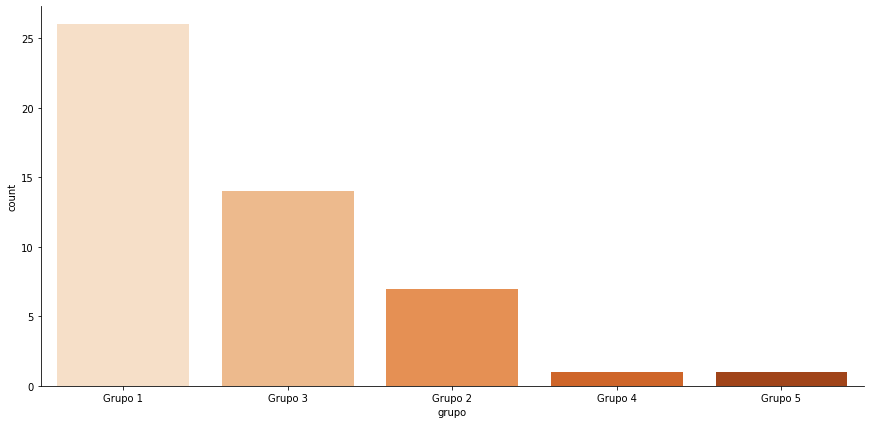

In [202]:
ax = sns.catplot(x="grupo", kind="count", palette="Oranges", height=6, aspect=2, order=df_demo['grupo'].value_counts().index, data=df_prep)


💡 A maior parte dos respondentes da pesquisa fazem parte do Grupo 1 (Alinhador, Almoxarife, Auxiliar, Balanceador etc.).

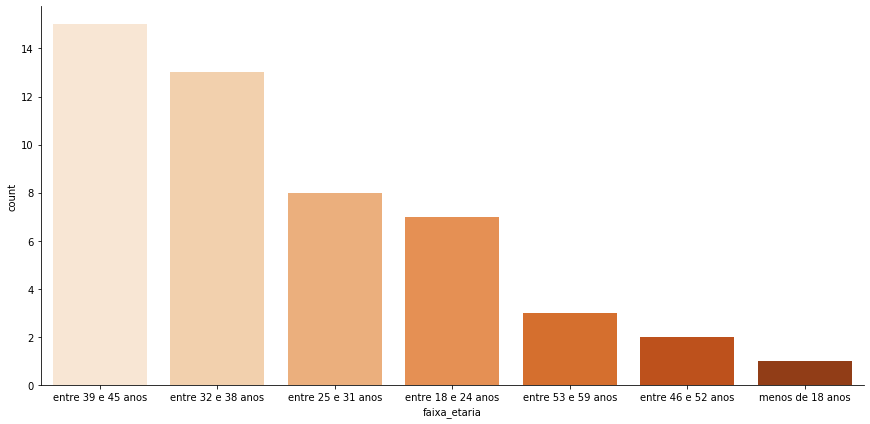

In [131]:
ax = sns.catplot(x="faixa_etaria", kind="count", palette="Oranges", height=6, aspect=2, order=df_demo['faixa_etaria'].value_counts().index, data=df_prep)


💡 Mais da metade está na faixa etária acima de 31 anos.

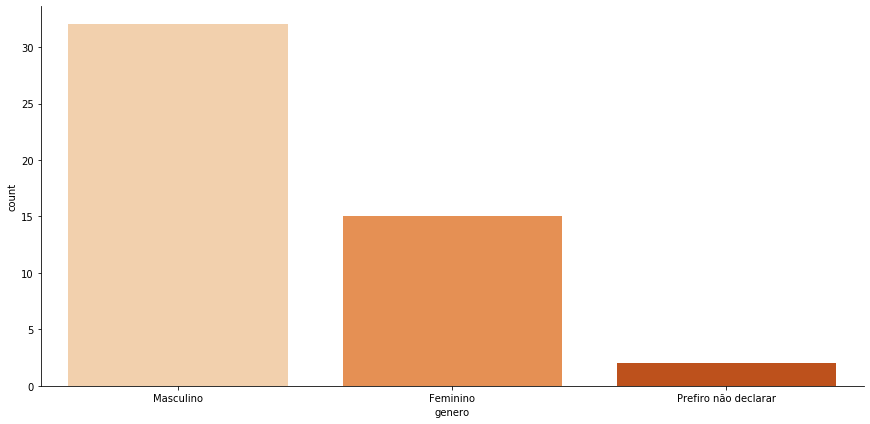

In [132]:
ax = sns.catplot(x="genero", kind="count", palette="Oranges", height=6, aspect=2, order=df_demo['genero'].value_counts().index, data=df_prep)


💡 Grupo masculino constitui 2 vezes o grupo feminino.

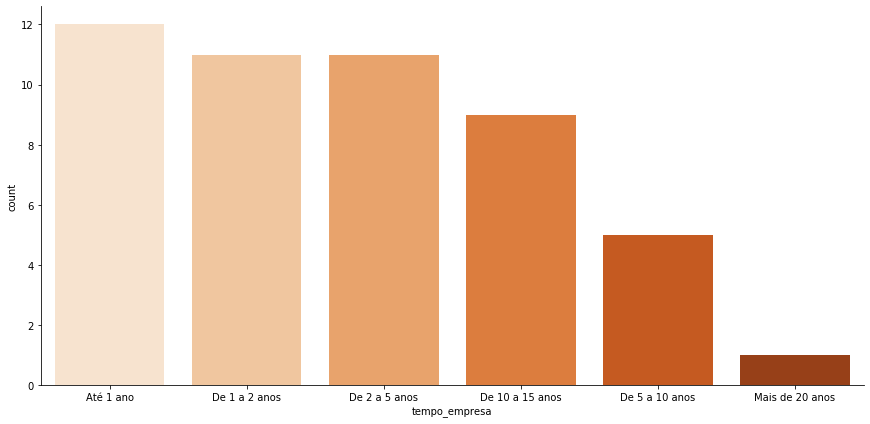

In [133]:
ax = sns.catplot(x="tempo_empresa", kind="count", palette="Oranges", height=6, aspect=2, order=df_demo['tempo_empresa'].value_counts().index, data=df_prep)

💡 Quase metade dos funcionários estão até 2 anos na empresa.

### 5.2 Expectativas
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

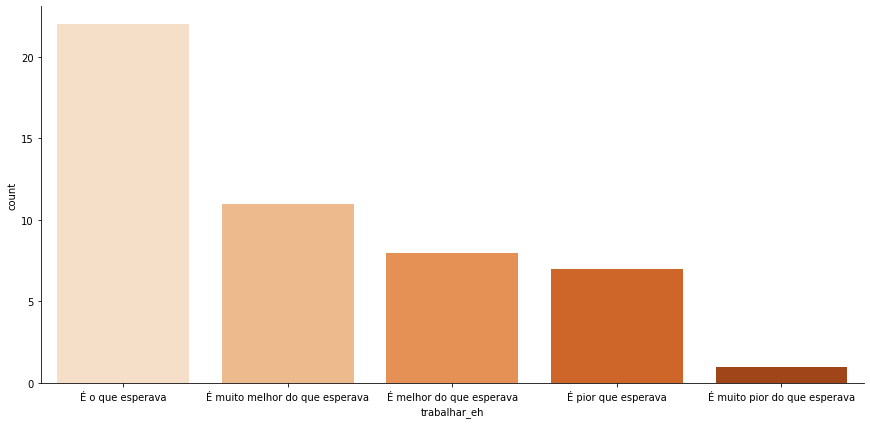

In [134]:
ax = sns.catplot(x="trabalhar_eh", kind="count", palette="Oranges", height=6, aspect=2, order=df_demo['trabalhar_eh'].value_counts().index, data=df_prep)


💡 22 pessoas afirmaram que o trabalho "É o que esperava", 2 vezes a mais do que o 2º maior grupo. 

In [203]:
# buscar NaN na coluna "expectativa"
df_prep.query("expectativa.isnull()")

,numero,grupo,faixa_etaria,genero,tempo_empresa,expectativa,trabalhar_eh,onbording,procedimento_funcao,meta_area,meta_followup,informacao_empresa,info_meio_gestor,info_meio_colegas,info_meio_email,info_meio_informativos,info_meio_whats,trabalho_resultado_clareza,nota_engajamento,visao_geral,visao_funcionario
17,18,Grupo 1,entre 53 e 59 anos,Feminino,Até 1 ano,NaN,É o que esperava,5,5,5,5,3,1,0,0,0,0,5,4.455267,"Empolgação (comprometimento, determinação)","Empolgação (comprometimento, determinação)"


In [204]:
# deletar linha 
df_cloud = df_prep.drop(17)

In [205]:
# criar conjunto de palavras
texto = " ".join(resposta for resposta in df_cloud['expectativa'])
print("Há {} palavras na coluna 'expectativa'.".format(len(texto)))

Há 1745 palavras na coluna 'expectativa'.


In [206]:
# Docstring
#?WordCloud

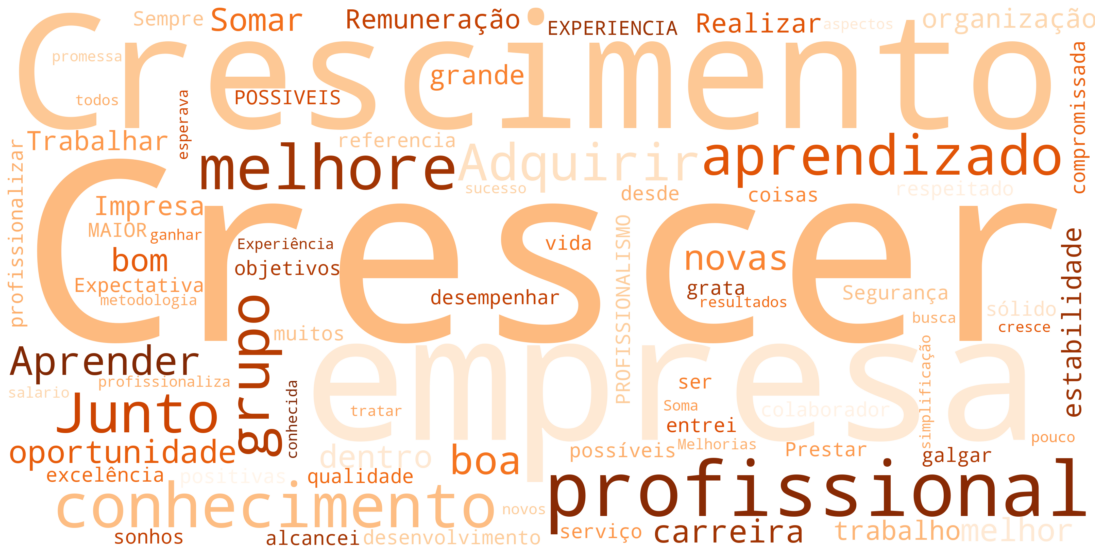

In [207]:
# stopwords em português:
## necessário baixar somente 1 vez
# nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')

# criar lista de stopword:
stopwords = set(stopwords)
stopwords.update(['pois'])

# gerar imagem 
wordcloud = WordCloud(stopwords=stopwords, max_words=300, background_color="white", 
                      scale=2, width=1600, height=800, colormap="Oranges").generate(texto)

# exibir a imagem gerada
plt.figure(figsize=(20,10))#, facecolor='lightblue')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# salvar imagem
#plt.savefig("expectativas.png", format="png")

plt.show()

💡 As palavras que aparecem com maior frequência quando os funcionários citam as expectativas no momento da contratação estão relacionadas a "empresa", "crescimento", "profissional", "oportunidade", "conhecimento".

### 5.3 Relação funcionário-empresa
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

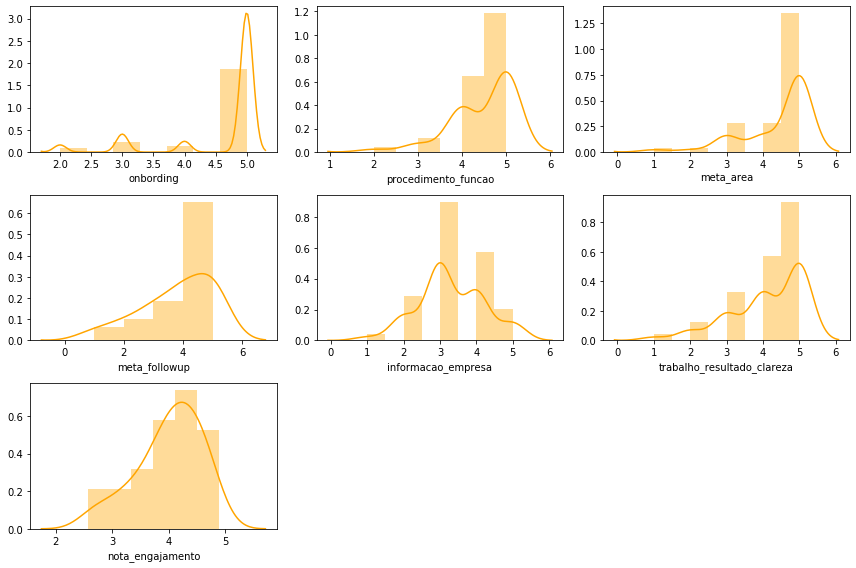

In [208]:
f, axes = plt.subplots(3, 3, figsize=(12, 8))
#sns.despine(left=True)

sns.distplot(df_prep['onbording'], ax=axes[0, 0], kde_kws={'bw': 0.1}, color="orange")
sns.distplot(df_prep['procedimento_funcao'], ax=axes[0, 1], color="orange")
sns.distplot(df_prep['meta_area'], ax=axes[0, 2], color="orange")
sns.distplot(df_prep['meta_followup'], ax=axes[1, 0], color="orange")
sns.distplot(df_prep['informacao_empresa'], ax=axes[1, 1], color="orange")
sns.distplot(df_prep['trabalho_resultado_clareza'], ax=axes[1, 2], color="orange")
sns.distplot(df_prep['nota_engajamento'], ax=axes[2, 0], color="orange")

f.delaxes(ax=axes[2, 1])
f.delaxes(ax=axes[2, 2])

#plt.setp(axes, yticks=[])
#plt.setp(axes, xticks=[])
plt.tight_layout()

💡 No geral, o funcionário conhece suas atribuições (**procedimento_funcao**) e metas da área (**meta_area**) desde o momento em que entra na empresa (**onbording**), mas de alguma forma perde-se o que acontece na empresa como um todo (**informacao_empresa**).

### 5.4 Canais de comunicação
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

### 5.5 Visões
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

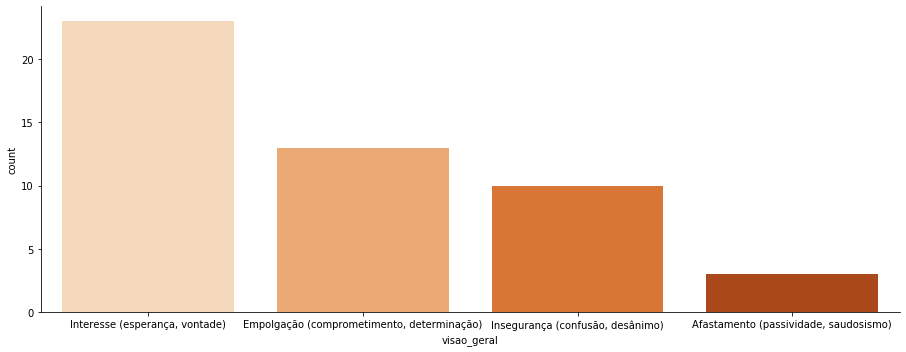

In [210]:
ax = sns.catplot(x="visao_geral", kind="count", palette="Oranges", height=5, aspect=2.5, order=df_demo['visao_geral'].value_counts().index, data=df_prep)


💡 A maioria dos funcionários acreditam que o "Interesse" representa a visão da maioria dos funcionários.

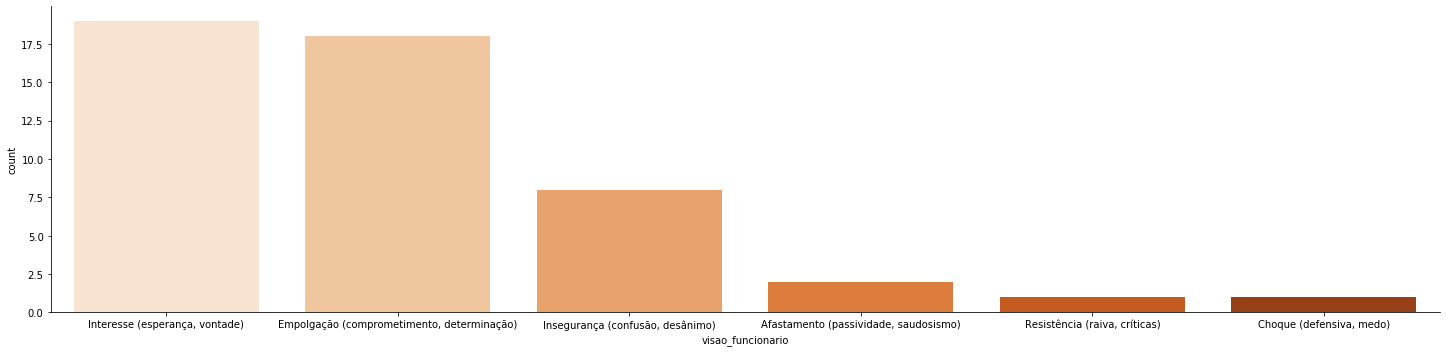

In [209]:
ax = sns.catplot(x="visao_funcionario", kind="count", palette="Oranges", height=5, aspect=4, order=df_demo['visao_funcionario'].value_counts().index, data=df_prep)


💡 Na visão do próprio funcionário, o sentimento que melhor representa o momento atual da empresa é uma união de "Interesse" e "Empolgação".